In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.utils import load_img, img_to_array

In [2]:
img_path = "C:/Users/bbeltzun/Downloads/Molly_all/Autumnmolly20061005000001.jpg"
img = load_img(img_path, target_size=(224, 224))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

In [3]:
base_model = keras.applications.VGG19(weights='imagenet')

In [20]:
for (layer,i) in zip(base_model.layers,range(len(base_model.layers))):
    print(i, layer.name)

0 input_2
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_conv4
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_conv4
16 block4_pool
17 block5_conv1
18 block5_conv2
19 block5_conv3
20 block5_conv4
21 block5_pool
22 flatten
23 fc1
24 fc2
25 predictions


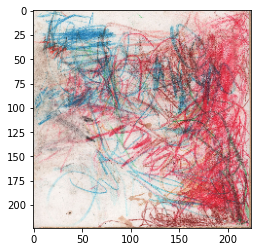

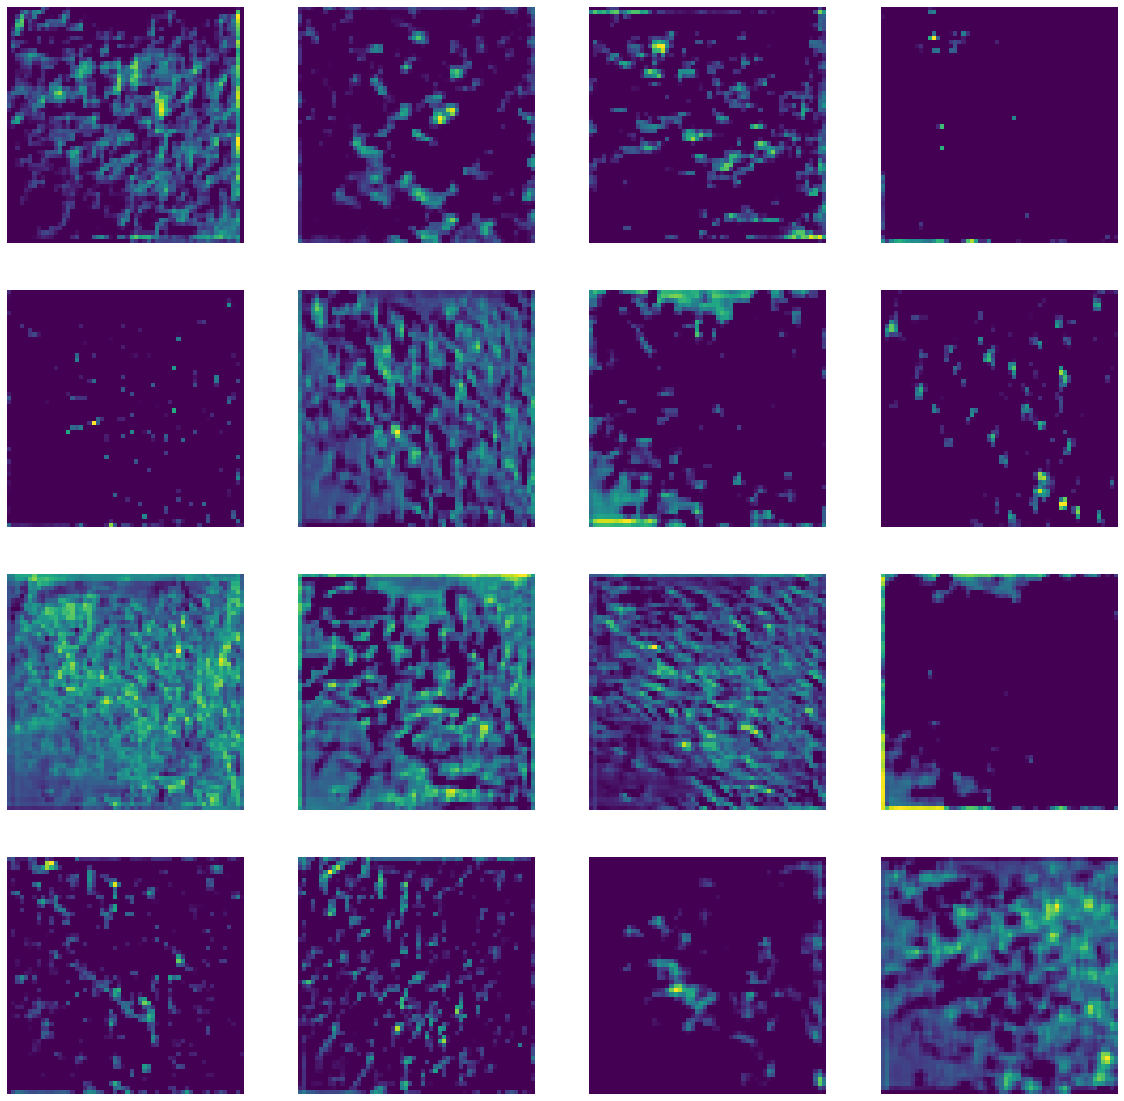

In [5]:
activation_model = Model(inputs=base_model.inputs, outputs=base_model.layers[7].output) # 1, 7, 17
activation = activation_model(img_tensor)
plt.imshow(img_tensor[0])

plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.imshow(activation[0,:,:,i])


plt.show()

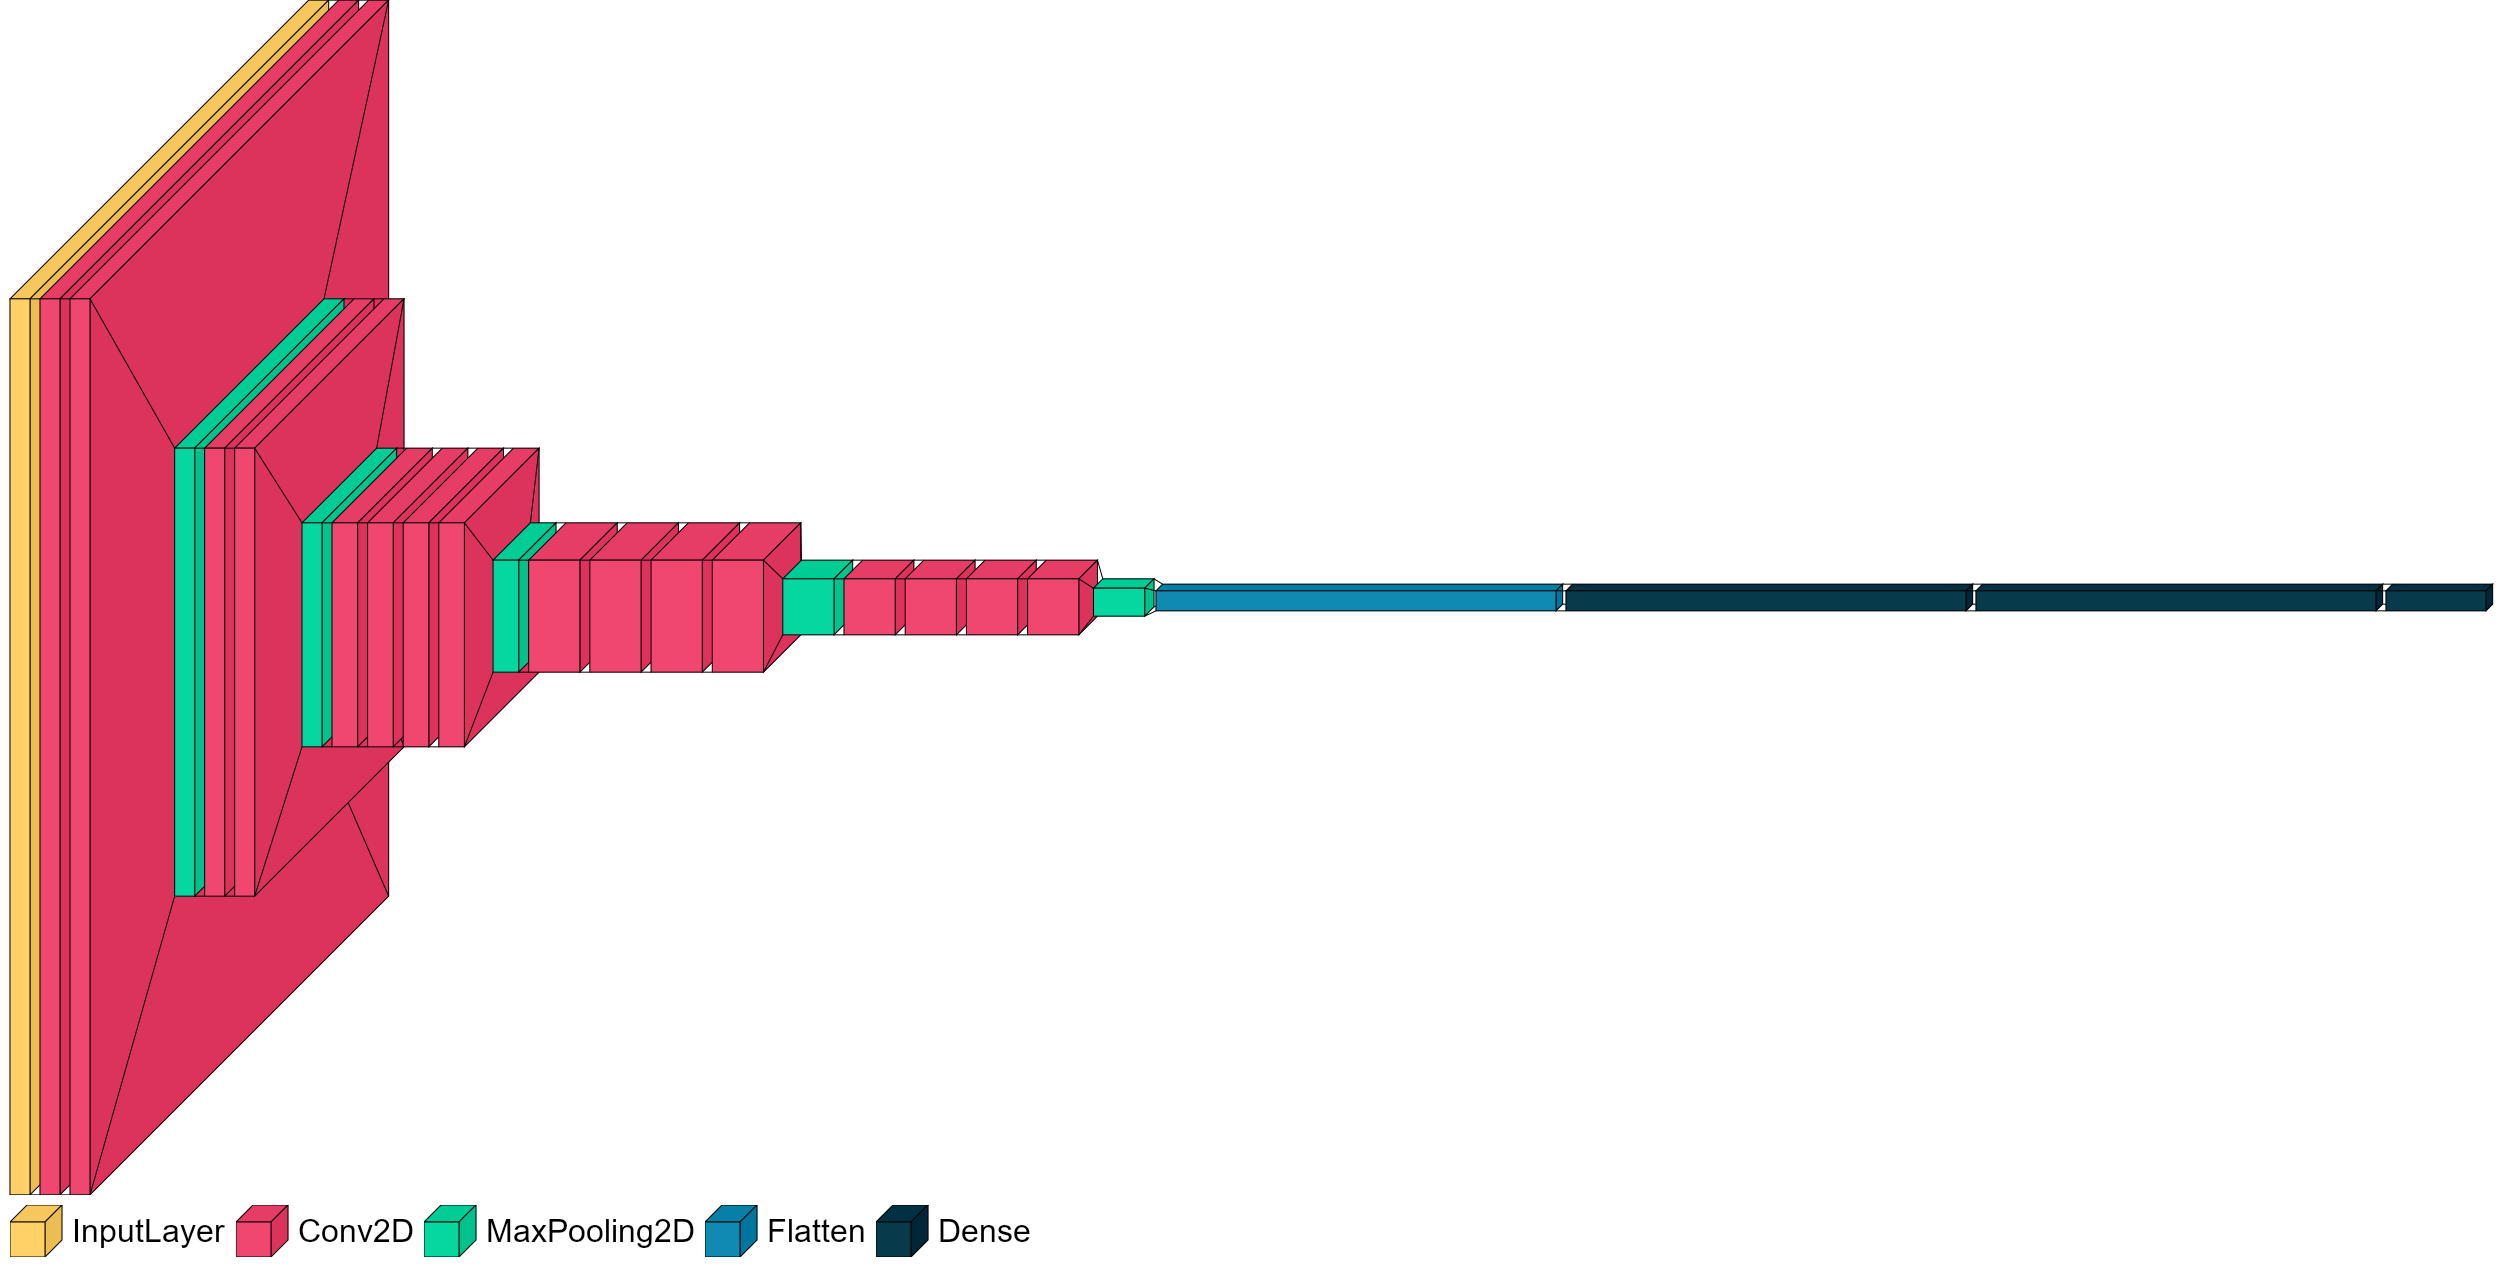

In [29]:
import visualkeras

model = base_model

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)
from PIL import ImageFont

font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font)  # font is optional!
